In [1]:
!pip install ultralytics roboflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from ultralytics import YOLO

# Load a model
# weight_path = "/content/drive/MyDrive/SOC_2024/best.pt"
model = YOLO("yolov8n.pt")
# model = YOLO(weight_path)  # load a custom model

In [4]:
result = model(source = "/content/figure-24-21.jpg", show=True, save = True, conf=0.4)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/figure-24-21.jpg: 448x640 1 person, 3 cars, 1 bus, 2 trucks, 947.3ms
Speed: 12.1ms preprocess, 947.3ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4


In [7]:
# Define a dictionary to map class indices to class names
class_names = {
    0: 'person',
    1: 'bicycle',
    2: 'car',
    3: 'motorbike',
    4: 'aeroplane',
    5: 'bus',
    6: 'train',
    7: 'truck',
    8: 'boat',
    9: 'traffic light',
    # Add other class names as needed
}

# Initialize a dictionary to count the occurrences of each class
class_counts = {}

# Process results list
for resul in result:
    boxes = resul.boxes  # Boxes object for bounding box outputs

    # Count the occurrences of each class
    for cls in boxes.cls:
        cls = int(cls)  # Convert tensor to int
        if cls in class_names:
            class_name = class_names[cls]
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1

# Generate the summary text
summary_text = ", ".join([f"{count} {cls}" for cls, count in class_counts.items()])

print(summary_text)


3 car, 2 truck, 1 bus, 1 person


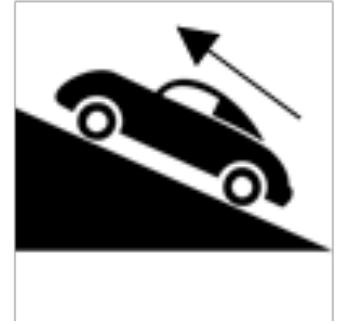

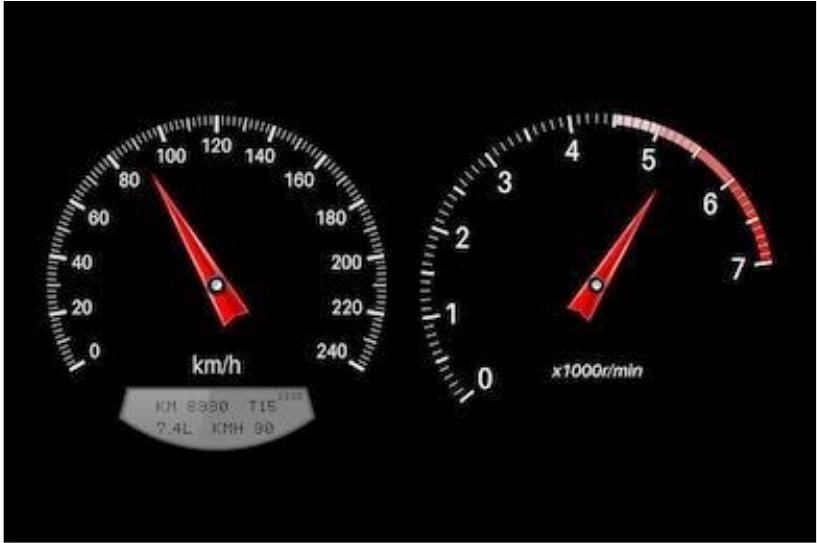

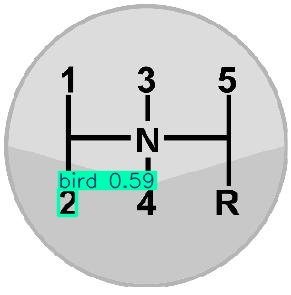

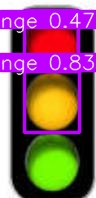

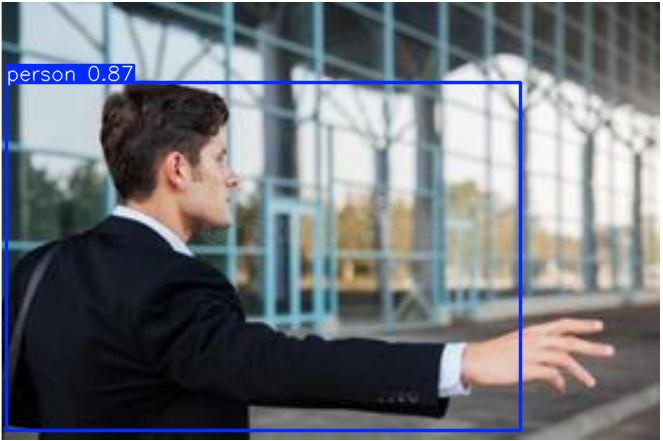

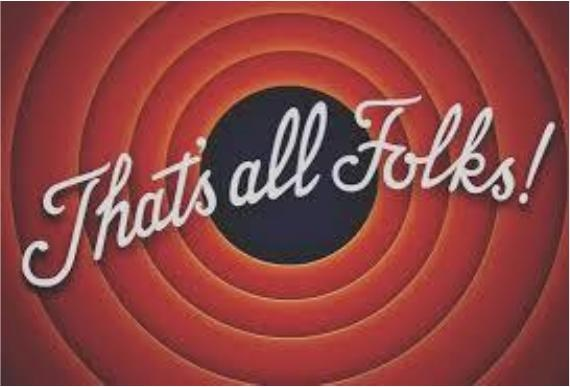

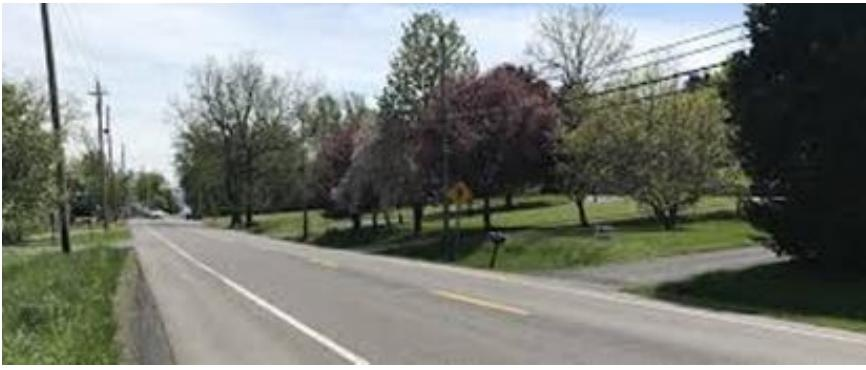

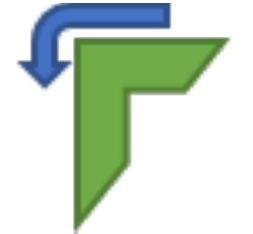

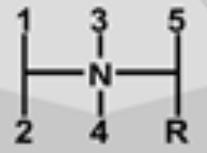

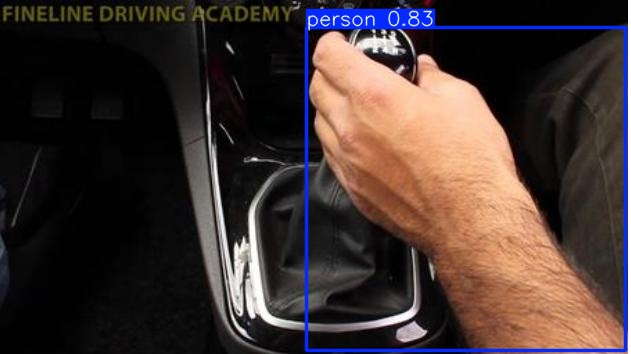

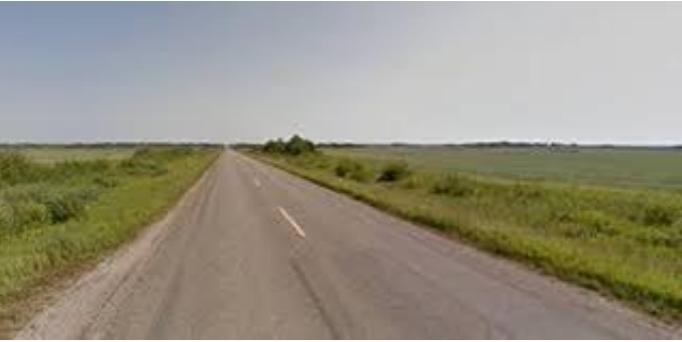

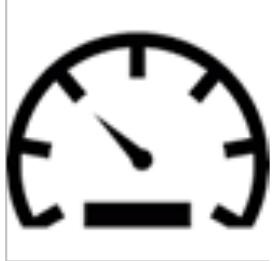

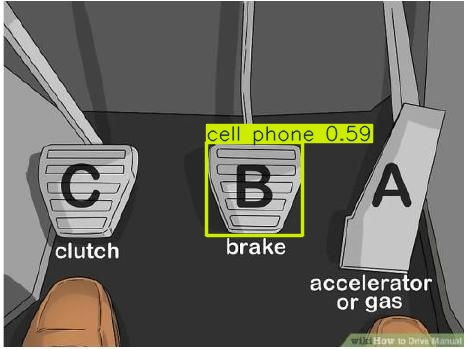

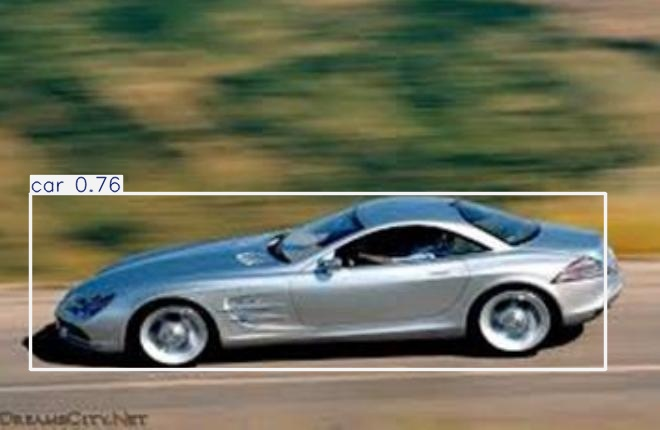

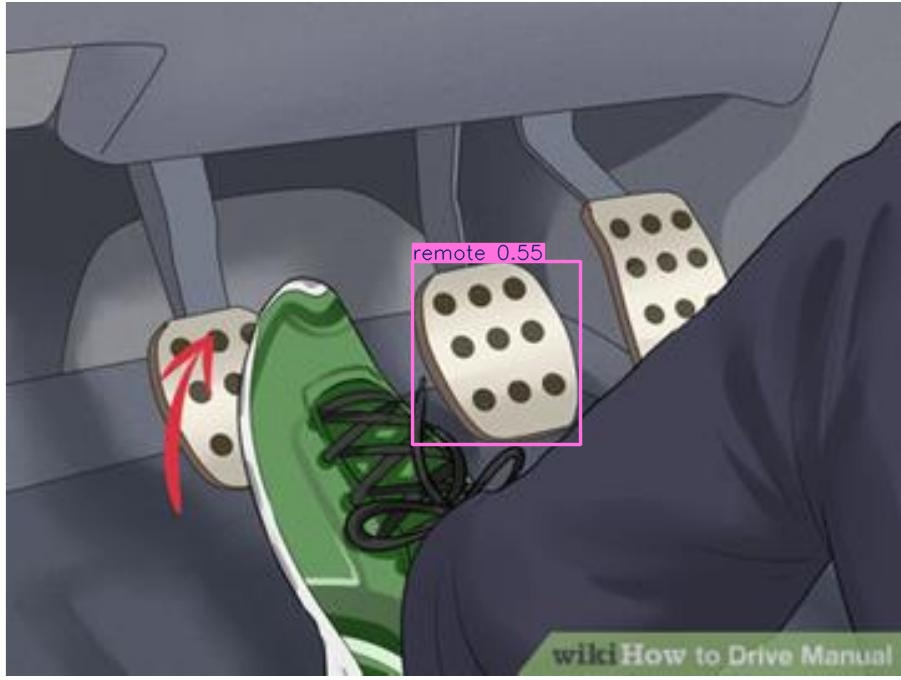

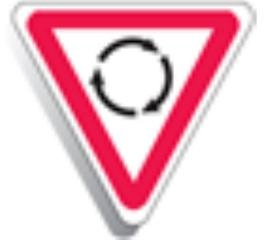

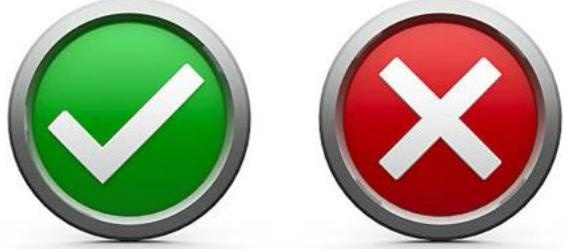

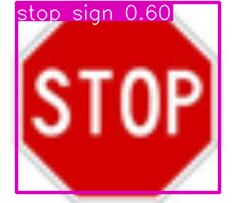

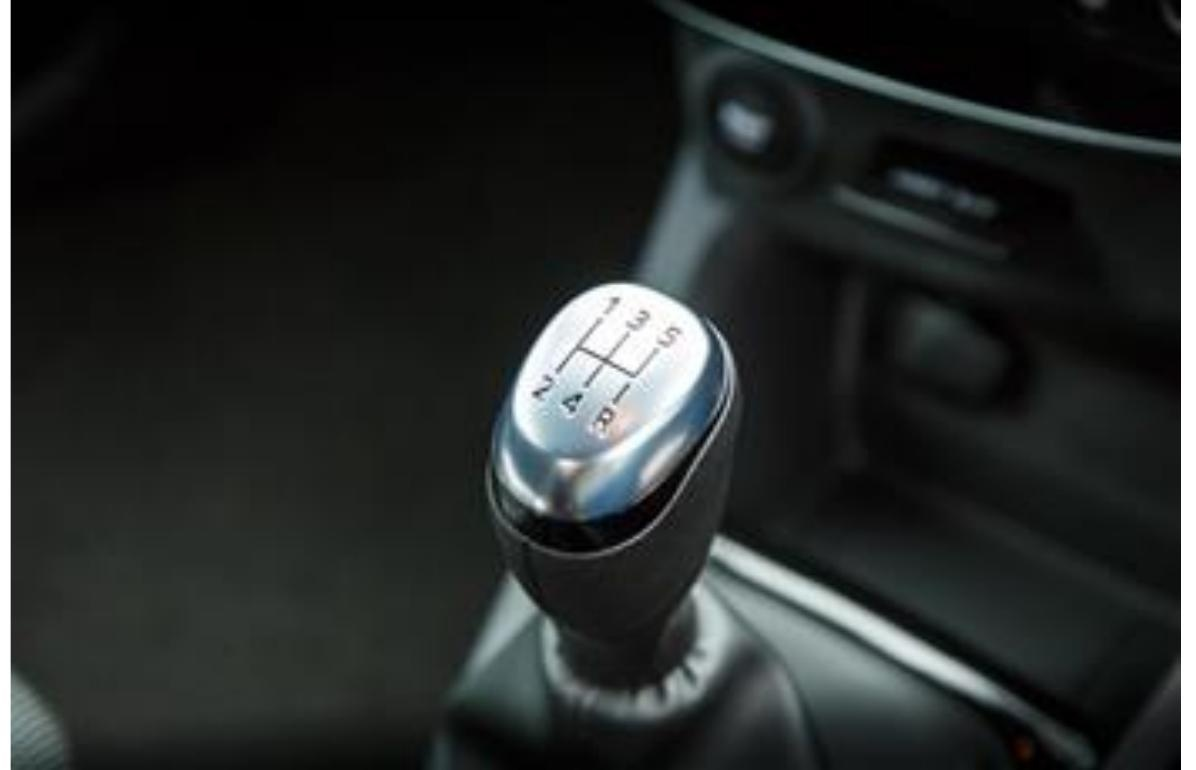

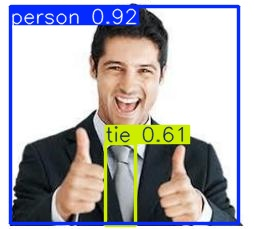

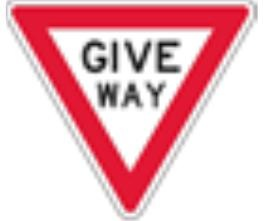

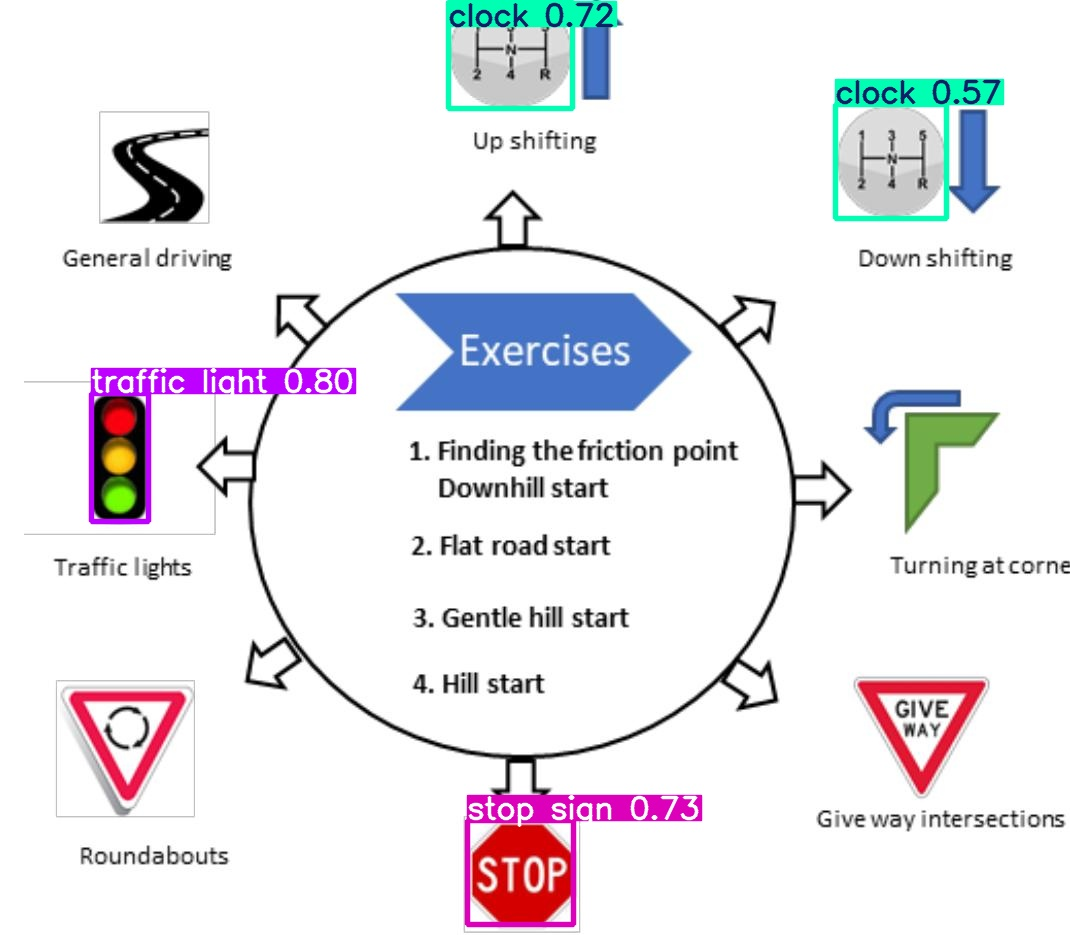

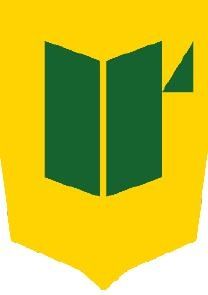

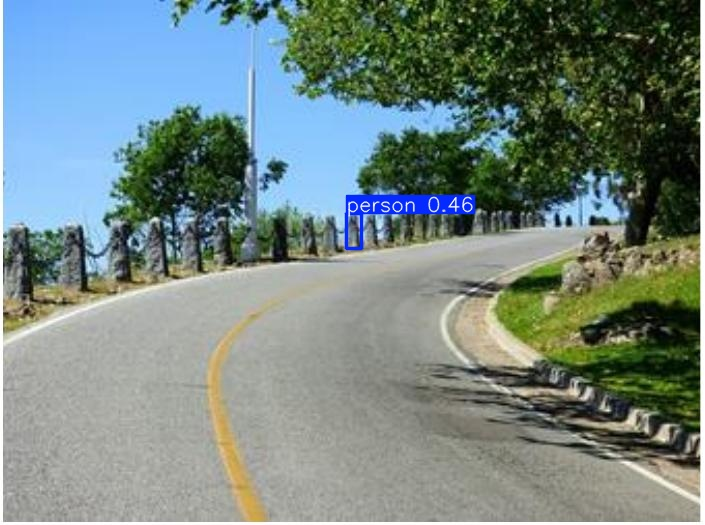

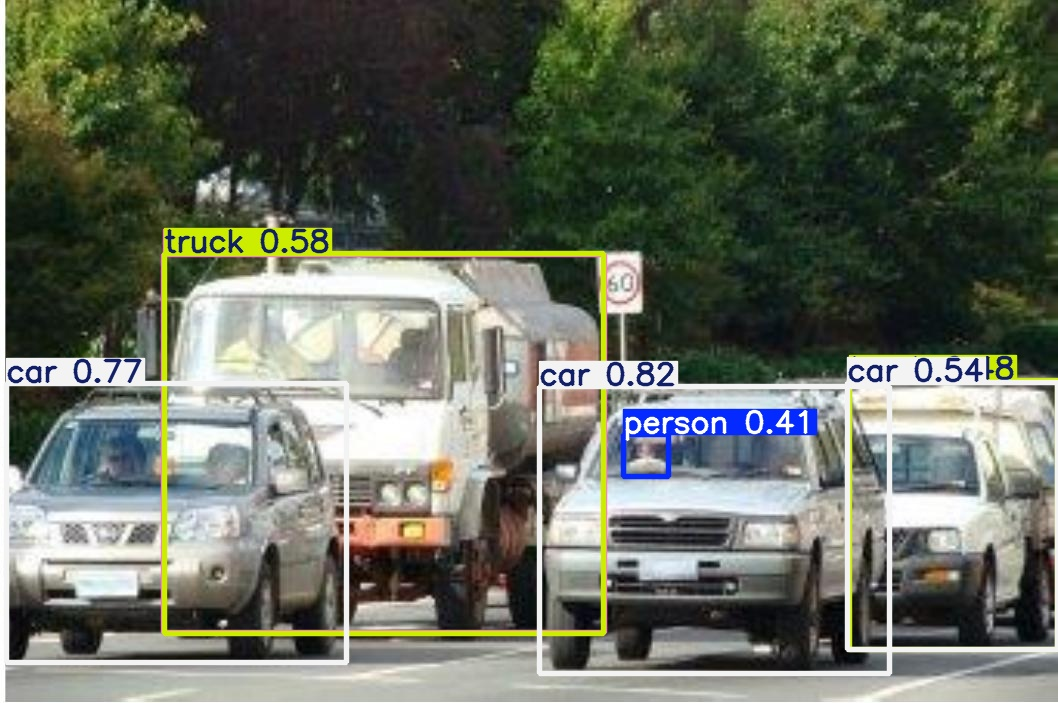

In [9]:
import os
from IPython.display import Image, display

directory = "/content/runs/detect/predict2"
for img_path in os.listdir(directory):
  full_path = os.path.join(directory, img_path)
  display(Image(filename = full_path, width = 320))